* 변수치우침 문제를 해결하기 위해, 여기서는 집 가격 데이터를 사용합니다.

In [1]:
#필요 모듈 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#데이터를 읽어온다.
df_train = pd.read_csv('./train_bias.csv')
#데이터를 출력한다.
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


KDE plot을 활용하여 왜도 확인 
* Distplot함수는 히스토그램을 그려주는 함수, 특정 값의 컬럼을 입력하여 확인
* Skewness 값이 매우 높으며, 그래프는 좌측으로 편향되어 있음 

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

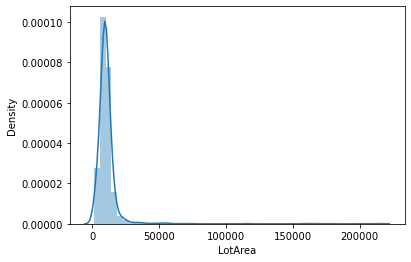

In [2]:
# skewness 확인
df_train['LotArea'].skew()
#12.2077

# KDE plot 확인
# 특정 컬럼 (LotArea)의 성분을 사용하여 히스토그램화
sns.distplot(df_train['LotArea'])


Log transformation (로그 변환)을 사용하여 해결 
* 로그 변환 전에 describe() 함수를 사용하여 최소값 확인, numpy.log 함수를 사용하여 변환 !
* 만약 0보다 작다면 최소값 +1을 모든 값에 적용하는 것이 보편적인 방법

In [4]:
df_train['LotArea'].describe()

# 로그 변환
df_log = np.log(df_train['LotArea'])


# skewness 확인
print(df_log.skew())
# -0.13799

# KDE plot 출력
df_log = np.log(df_train['LotArea'])


-0.1379938086958118
